**Our project deals with the analysis of various politicians on social networks and the analysis of their popularity on the various platforms**

*   Part 1 - Trump VS Biden analasys
    This section we compared the popularity of the politician by comparing
    the  number of repeated tweets of each politician by date.

*   Part 2 - In this section we explored whether there is a match between 
    politicians' popularity on different news sites versus people's reactions
    and their tweets on Twitter.

*   Part 3 - In this section we have created a model for predicting the 
    popularity and sentiment of politicians.






# **imports**

In [ ]:
!pip install panda

!pip install tweepy
!pip install turicreate
!pip install kaggle 
!pip install spaCy
!pip install nltk

In [ ]:
!pip install turicreate

In [ ]:
!python -m spacy download en_core_web_lg #restart run time

In [ ]:
import os
import tweepy as tw
import pandas as pd
import turicreate as tc
import spacy
from spacy import displacy
import datetime
import turicreate as tc
import pandas as pd
import time

In [ ]:
!pip install Afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

# **Part 1 - Trump VS Biden analasys**


## data

In [ ]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"ayalonazlan","key":"7749c6f0cc677bb6d123679631499d78"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import json
import os




# https://www.kaggle.com/austinreese/trump-tweets

!mkdir ./datasets
!mkdir ./datasets/tweets

!kaggle datasets download austinreese/trump-tweets -p ./datasets/tweets/
!unzip ./datasets/tweets/*.zip -d ./datasets/tweets

!ls ./datasets/tweets

  0% 0.00/6.88M [00:00<?, ?B/s]
100% 6.88M/6.88M [00:00<00:00, 63.9MB/s]
Archive:  ./datasets/tweets/trump-tweets.zip
  inflating: ./datasets/tweets/realdonaldtrump.csv  
  inflating: ./datasets/tweets/trumptweets.csv  
realdonaldtrump.csv  trumptweets.csv  trump-tweets.zip


In [ ]:
DATA_SETS_PATH = "./datasets/tweets"

#getting a blog post
sf_posts = tc.SFrame.read_csv(f"{DATA_SETS_PATH}/trumptweets.csv")
relevant_tweets_of_trump=sf_posts['date','retweets','favorites']

relevant_tweets_of_trump

In [ ]:
relevant_tweets_of_trump_copy=relevant_tweets_of_trump

In [ ]:
##choose only the date we need
def choosen_date(date):
    
    split_date=date.split(" ")
    relevant_date=split_date[0].split('-')
    year=int(relevant_date[0])
    month=int(relevant_date[1])
    day=int(relevant_date[2])
  
    # 
    if (year == 2012 and month == 10) and (day == 1 or day == 2 or day== 3 or day == 4):  
      
      return 1 
      
    else:
      
      return 0  
 
relevant_tweets_of_trump_copy['relevant_date'] = relevant_tweets_of_trump['date'].apply(lambda date: choosen_date(date)) 
relevant_tweets_of_trump_copy=relevant_tweets_of_trump_copy[relevant_tweets_of_trump_copy['relevant_date'].apply(lambda s: s==1)]

In [ ]:
import turicreate.aggregate as agg

def dates_we_need(tweets):
  list_of_dates=[]
  for row in tweets:
    date_we_need=row['date'].split(' ')[0]
    list_of_dates.append(date_we_need)
    date_we_need=""
  return list_of_dates

In [ ]:
relevant_tweets_of_trump_copy['Date'] = dates_we_need(relevant_tweets_of_trump_copy) 

In [ ]:
most_trump_relevant_tweets=relevant_tweets_of_trump_copy['retweets','favorites','Date']

In [ ]:
most_trump_relevant_tweets

retweets,favorites,Date
2,1,2012-10-01
640,180,2012-10-01
634,232,2012-10-01
30,12,2012-10-01
14,9,2012-10-01
12,12,2012-10-01
130,28,2012-10-01
54,4,2012-10-01
11,4,2012-10-01
27,12,2012-10-01


In [ ]:
def five_tweets_from_each_date(data):

  dates=[]
  retweets=[]
  dates_and_retweets=[]
  counter=0
  for row in data:   
      relevant_date_from_table=row['Date']
      relevant_retweet=row['retweets']
      split_date=relevant_date_from_table.split(" ")
      relevant_date=split_date[0].split('-')
      day=int(relevant_date[2])
      counter+=1
      if counter<=5:
        dates.append(relevant_date)
        retweets.append(relevant_retweet)
        dates_and_retweets.append([relevant_date_from_table,relevant_retweet])
      else:
        if relevant_date in dates:
          continue
        else:
          counter=1
          dates.append(relevant_date)
          retweets.append(relevant_retweet)
          dates_and_retweets.append([relevant_date_from_table,relevant_retweet])
          continue
  new_df = pd.DataFrame(data=dates_and_retweets, 
                    columns=['Date', "retweets"])
  return new_df      

In [ ]:
five_relevant_tweets_from_each_date_Trump=five_tweets_from_each_date(most_trump_relevant_tweets)
five_relevant_tweets_from_each_date_Trump

,Date,retweets
0,2012-10-01,2
1,2012-10-01,640
2,2012-10-01,634
3,2012-10-01,30
4,2012-10-01,14
5,2012-10-02,526
6,2012-10-02,485
7,2012-10-02,2223
8,2012-10-02,248
9,2012-10-02,340


In [ ]:
count_retweets_Trump=five_relevant_tweets_from_each_date_Trump.groupby(['Date']).sum().reset_index()
count_retweets_Trump

,Date,retweets
0,2012-10-01,1320
1,2012-10-02,3822
2,2012-10-03,4072
3,2012-10-04,5363


ביידן


In [ ]:
# https://www.kaggle.com/rohanrao/joe-biden-tweets
!kaggle datasets download rohanrao/joe-biden-tweets -p ./datasets/tweets_of_joe/
!unzip ./datasets/tweets_of_joe/*.zip -d ./datasets/tweets_of_joe

!ls ./datasets/tweets_of_joe

In [ ]:
DATA_SETS_PATH = "./datasets/tweets_of_joe"

#getting a blog post
sf_posts = tc.SFrame.read_csv(f"{DATA_SETS_PATH}/JoeBidenTweets.csv")
relevant_tweets_of_Biden=sf_posts['timestamp','retweets']

sf_posts

In [ ]:
relevant_tweets_of_Biden_copy=relevant_tweets_of_Biden

In [ ]:
relevant_tweets_of_Biden_copy['relevant_date'] = relevant_tweets_of_Biden['timestamp'].apply(lambda date: choosen_date(date)) 

In [ ]:
relevant_tweets_of_Biden_copy=relevant_tweets_of_Biden_copy[relevant_tweets_of_Biden_copy['relevant_date'].apply(lambda s: s==1)]

In [ ]:
relevant_tweets_of_Biden_copy = relevant_tweets_of_Biden_copy.rename({'timestamp': 'date'})
relevant_tweets_of_Biden_copy

date,retweets,relevant_date
2012-10-01 03:16,133,1
2012-10-01 15:59,44,1
2012-10-01 19:05,52,1
2012-10-01 19:29,43,1
2012-10-01 23:07,17,1
2012-10-02 19:20,23,1
2012-10-02 19:34,61,1
2012-10-02 19:41,52,1
2012-10-02 21:50,109,1
2012-10-02 22:15,58,1


In [ ]:
relevant_tweets_of_Biden_copy['Date'] = dates_we_need(relevant_tweets_of_Biden_copy) 
most_Biden_relevant_tweets=relevant_tweets_of_Biden_copy['retweets','Date']

In [ ]:
five_relevant_tweets_from_each_date_Biden=five_tweets_from_each_date(most_Biden_relevant_tweets)

five_relevant_tweets_from_each_date_Biden

,Date,retweets
0,2012-10-01,133
1,2012-10-01,44
2,2012-10-01,52
3,2012-10-01,43
4,2012-10-01,17
5,2012-10-02,23
6,2012-10-02,61
7,2012-10-02,52
8,2012-10-02,109
9,2012-10-02,58


In [ ]:
count_retweets_Biden=five_relevant_tweets_from_each_date_Biden.groupby(['Date']).sum().reset_index()
count_retweets_Biden

,Date,retweets
0,2012-10-01,289
1,2012-10-02,303
2,2012-10-03,465
3,2012-10-04,2276


## Analasys

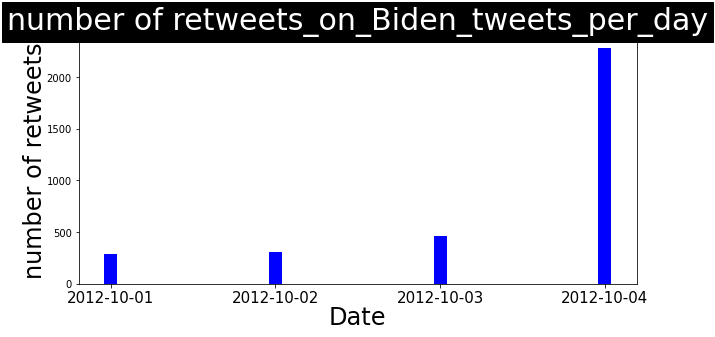

In [ ]:
##topic by date in graph
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, figsize=(10,10))
ax2 = fig.add_subplot(2,1,2)
y_axis = count_retweets_Biden['retweets'].tolist()
x_axis = count_retweets_Biden['Date'].tolist()
plt.xticks(fontsize = 15)
plt.ylabel("number of retweets", fontsize = 24, labelpad = 0)
plt.xlabel('Date', fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='b', width=0.08)
plt.title("number of retweets_on_Biden_tweets_per_day",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

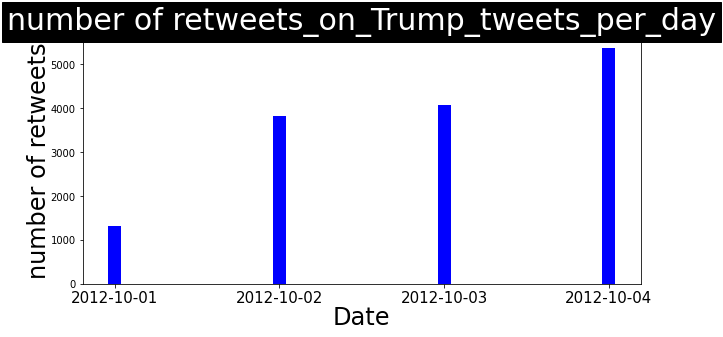

In [ ]:
##topic by date in graph
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, figsize=(10,10))
ax2 = fig.add_subplot(2,1,2)
y_axis = count_retweets_Trump['retweets'].tolist()
x_axis = count_retweets_Trump['Date'].tolist()
plt.xticks(fontsize = 15)
plt.ylabel("number of retweets", fontsize = 24, labelpad = 0)
plt.xlabel('Date', fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='b', width=0.08)
plt.title("number of retweets_on_Trump_tweets_per_day",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

# **Part 2 - Analasys of politicians popularity - Articles and Twitts**
The **New York Time** website and the **BBC** website

## **get twitts**

### twitter data

In [ ]:
consumer_key= 'DrrjziYCG9of91tnOLKANDhab'
consumer_secret= 'aOuTMIXru0sT4ESjZqn6NhxN1nE1tVkhx8WtqUyPDOyJk7wD3j'
access_token= '1356649018890342400-mOwUTiLxSkj1tEnJNinzZFRKKOZtha'
access_token_secret= 'BpMhwD4iMNFFSS3uGJ3Tje5t39LK16iXPdmnqfA9zalm9'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
date_since = "2021-7-01"
# search_words = "#@realDonaldTrump"
all_politicions=[]
# search_words = "#@KamalaHarris"
Mitt = "#@MittRomney"
Donald="#@DonaldTrump"
Biden="#@JoeBiden"
John="#@JohnKerry"
all_politicions.append(Mitt)
all_politicions.append(Donald)
all_politicions.append(Biden)
all_politicions.append(John)
all_politicions

['#@MittRomney', '#@DonaldTrump', '#@JoeBiden', '#@JohnKerry']

In [ ]:
import pandas as pd
import turicreate.aggregate as agg

In [ ]:
num_of_twitts_MittRomney = 2000
num_of_twitts_DonaldTrump = 2000
num_of_twitts_JoeBiden = 1900
num_of_twitts_JohnKerry = 2000

In [ ]:
for politician in all_politicions: 
  try:
      if 'MittRomney' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(num_of_twitts_MittRomney)
      if 'DonaldTrump' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(num_of_twitts_DonaldTrump)
      if 'JoeBiden' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(num_of_twitts_JoeBiden)
      if 'JohnKerry' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(num_of_twitts_JohnKerry)

      ##############################################################################      
      all_tweets = []
      for tweet in tweets:
          all_tweets.append(tweet.text) 

      all_tweets_in_lists=[]   
    # users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
      for term in all_tweets:
        term=[politician, term]
        all_tweets_in_lists.append(term)   
      
      if politician is Mitt: 
        tweets_text = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])                    
      else:
        # print(True)
        tweets = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])  
        tweets_text=tweets_text.append(tweets)
  except tw.TweepError:
        time.sleep(60 * 15)
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(20)
        all_tweets = []
        for tweet in tweets:
            all_tweets.append(tweet.text) 
        if politician is Mike: 
          tweets_text = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])                    
        else:
        # print(True)
          
          tweets = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])  
          tweets_text=tweets_text.append(tweets)
        continue
  except StopIteration:
        break        


In [ ]:
tweets_text

,politician,comment_for_tweet
0,#@MittRomney,RT @MittRomney: They represented the very best...
1,#@MittRomney,RT @MittRomney: They represented the very best...
2,#@MittRomney,RT @mary92226897: @MittRomney @JRubinBlogger h...
3,#@MittRomney,RT @MittRomney: They represented the very best...
4,#@MittRomney,RT @MittRomney: They represented the very best...
...,...,...
1995,#@JohnKerry,RT @PaulEDawson: Failing to address climate ch...
1996,#@JohnKerry,RT @PaulEDawson: Failing to address climate ch...
1997,#@JohnKerry,@JohnKerry we need a renewable energy and carb...
1998,#@JohnKerry,@OlafScholz @ArminLaschet @ABaerbock \n@EskenS...


In [ ]:
for politician in all_politicions: 
  try:
      if 'MittRomney' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(1)
      if 'DonaldTrump' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(1000) #1000
      if 'JoeBiden' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(1)
      if 'JohnKerry' in politician:
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(500) #500

      ##############################################################################      
      all_tweets = []
      for tweet in tweets:
          all_tweets.append(tweet.text) 

      all_tweets_in_lists=[]   
    # users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
      for term in all_tweets:
        term=[politician, term]
        all_tweets_in_lists.append(term)   
      
      if politician is Mitt: 
        tweets_text_sml = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])                    
      else:
        # print(True)
        tweets = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])  
        tweets_text_sml = tweets_text_sml.append(tweets)
  except tw.TweepError:
        time.sleep(60 * 15)
        tweets = tw.Cursor(api.search,
                    q=politician,           
                    since=date_since).items(20)
        all_tweets = []
        for tweet in tweets:
            all_tweets.append(tweet.text) 
        if politician is Mike: 
          tweets_text_sml = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])                    
        else:
        # print(True)
          
          tweets = pd.DataFrame(data=all_tweets_in_lists, 
                          columns=['politician', "comment_for_tweet"])  
          tweets_text_sml = tweets_text_sml.append(tweets)
        continue
  except StopIteration:
        break        


Rate limit reached. Sleeping for: 770


In [ ]:
tweets_text_sml   


,politician,comment_for_tweet
0,#@MittRomney,RT @MittRomney: They represented the very best...
0,#@DonaldTrump,@DonaldTrump fuck me I am famous
1,#@DonaldTrump,@FoxNews @donaldtrump https://t.co/22WpDy6An4
2,#@DonaldTrump,Sabrán Uds. que esto con @DonaldTrump no estar...
3,#@DonaldTrump,RT @rahulpandit1881: अमेरिका को याद आये @Donal...
...,...,...
495,#@JohnKerry,RT @byadavbjp: Had a telephonic conversation w...
496,#@JohnKerry,👋 @POTUS @JohnKerry the US can help poorer nat...
497,#@JohnKerry,👋 @POTUS @JohnKerry @Gina_McCarthy I want you ...
498,#@JohnKerry,RT @moefcc: HMEFCC Shri @byadavbjp had a telep...


In [ ]:
tweets_text_all = pd.concat( [tweets_text_sml, tweets_text] )

In [ ]:
tweets_text_all["politician"].replace({"#@MittRomney": "Mitt-Romney", "#@DonaldTrump": "Donald-Trump","#@JoeBiden": "Joe-Biden", "#@JohnKerry": "John-Kerry"}, inplace=True)
tweets_text_all

In [ ]:
clean_tweet_text = tweets_text_all

In [ ]:
clean_tweet_text

,politician,comment_for_tweet,clean_comment
0,Mitt-Romney,RT @MittRomney: They represented the very best...,rt mittromney represented best finest america...
0,Donald-Trump,@DonaldTrump fuck me I am famous,donaldtrump fuck famous
1,Donald-Trump,@FoxNews @donaldtrump https://t.co/22WpDy6An4,foxnews donaldtrump https co 22wpdy6an4
2,Donald-Trump,Sabrán Uds. que esto con @DonaldTrump no estar...,sabrn uds que esto con donaldtrump estara pas...
3,Donald-Trump,RT @rahulpandit1881: अमेरिका को याद आये @Donal...,rt rahulpandit1881 donaldtrump potus ivankatr...
...,...,...,...
1995,John-Kerry,RT @PaulEDawson: Failing to address climate ch...,rt pauledawson failing address climate change...
1996,John-Kerry,RT @PaulEDawson: Failing to address climate ch...,rt pauledawson failing address climate change...
1997,John-Kerry,@JohnKerry we need a renewable energy and carb...,johnkerry need renewable energy carbon captur...
1998,John-Kerry,@OlafScholz @ArminLaschet @ABaerbock \n@EskenS...,olafscholz arminlaschet abaerbock eskensaskia...


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
from collections import Counter
import re
import nltk
import turicreate as tc
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re




def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')



def clean_posts(s):
  entities=[]
  doc = nlp(s)
  for entity in doc.ents:
      
    entities.append(str(entity))
  
  sentence=""
  for word in s:
    if word not in entities:
      sentence=sentence+word
  all_words=""
  sentence=sentence.lower()
  sentence = deEmojify(sentence)
  words_list = word_tokenize(sentence)
  re_words = re.compile(r"(\w+)")
  
  l = re_words.findall(sentence)
  
  stop_words_set = set(stopwords.words("english"))
  words_list = [w for w in l if w not in stop_words_set]
  for word in words_list:
    all_words=all_words+' '+word
  return all_words

clean_tweet_text['clean_comment']=tweets_text_all['comment_for_tweet'].apply(lambda s: clean_posts(s))  


In [ ]:
sf_weet_text=tc.SFrame(clean_tweet_text)

In [ ]:
sf_weet_text

politician,comment_for_tweet,clean_comment,content_afinn_score
Mitt-Romney,RT @MittRomney: Theyrepresented the very ...,rt mittromneyrepresented best finest ...,4.0
Donald-Trump,@DonaldTrump fuck me I amfamous ...,donaldtrump fuck famous,-2.0
Donald-Trump,@FoxNews @donaldtrumphttps://t.co/22WpDy6An4 ...,foxnews donaldtrumphttps co 22wpdy6an4 ...,0.0
Donald-Trump,Sabrán Uds. que esto con@DonaldTrump no estaría ...,sabrn uds que esto condonaldtrump estara ...,0.0
Donald-Trump,RT @rahulpandit1881:अमेरिका को याद आये ...,rt rahulpandit1881donaldtrump potus ...,0.0
Donald-Trump,RT @codeysharp: Everysingle #AfghanDeath can ...,rt codeysharp everysingle afghandeath bl ...,-2.0
Donald-Trump,@Gabizin93097753@RevistaCrusoe @JoeBiden ...,gabizin93097753revistacrusoe joebiden ...,0.0
Donald-Trump,@DonaldTrump sorry to saybut the day american ...,donaldtrump sorry sayday american people ...,-2.0
Donald-Trump,RT @ASAF90916341: עודמישהו מתגעגע עליהם ...,rt asaf90916341 someoneelse misses today ...,1.0
Donald-Trump,el-salvador &amp; amerikahalkı \n@DonaldTrump\ ...,el salvador amp amerikahalk donaldtrump ...,0.0


In [ ]:
sf_weet_text_new = sf_weet_text
sf_weet_text_new['content']=sf_weet_text_new['clean_comment'].apply(lambda s: clean_posts(s)) 
sf_twitts_new_text=tc.SFrame(sf_weet_text_new)

In [ ]:
comments_on_politicians = sf_weet_text.groupby("politician",{"all_comments":agg.CONCAT("clean_comment")})
comments_on_politicians_df=comments_on_politicians.to_dataframe()

In [ ]:
comments_on_politicians_df

### afinn twitter data

In [ ]:
twitts_data_sf = sf_weet_text

In [ ]:
twitts_data_sf

politician,comment_for_tweet,clean_comment
Mitt-Romney,RT @MittRomney: Theyrepresented the very ...,rt mittromneyrepresented best finest ...
Donald-Trump,@DonaldTrump fuck me I amfamous ...,donaldtrump fuck famous
Donald-Trump,@FoxNews @donaldtrumphttps://t.co/22WpDy6An4 ...,foxnews donaldtrumphttps co 22wpdy6an4 ...
Donald-Trump,Sabrán Uds. que esto con@DonaldTrump no estaría ...,sabrn uds que esto condonaldtrump estara ...
Donald-Trump,RT @rahulpandit1881:अमेरिका को याद आये ...,rt rahulpandit1881donaldtrump potus ...
Donald-Trump,RT @codeysharp: Everysingle #AfghanDeath can ...,rt codeysharp everysingle afghandeath bl ...
Donald-Trump,@Gabizin93097753@RevistaCrusoe @JoeBiden ...,gabizin93097753revistacrusoe joebiden ...
Donald-Trump,@DonaldTrump sorry to saybut the day american ...,donaldtrump sorry sayday american people ...
Donald-Trump,RT @ASAF90916341: עודמישהו מתגעגע עליהם ...,rt asaf90916341 someoneelse misses today ...
Donald-Trump,el-salvador &amp; amerikahalkı \n@DonaldTrump\ ...,el salvador amp amerikahalk donaldtrump ...


In [ ]:
twitts_data_sf['content_afinn_score'] = twitts_data_sf['clean_comment'].apply(lambda t: afinn.score(t))

In [ ]:
twitts_data_sf = twitts_data_sf[twitts_data_sf['content_afinn_score'] != 0] #delete title with score 0 not pos and not neg

In [ ]:
twitts_data_sen_sf = twitts_data_sf
twitts_data_score_sf = twitts_data_sf

In [ ]:
twitts_data_score_sf_gb =  twitts_data_sf.groupby(['politician'],{"twitts_sum_score":agg.SUM('content_afinn_score')})

In [ ]:
twitts_data_score_sf_gb

In [ ]:
twitts_data_sen_sf

In [ ]:
def label2sentiment2(label):
    if label >= 1:
        return "Positive"
    else:
        return "Negative"

In [ ]:
twitts_data_sen_sf['sentiment'] = twitts_data_sen_sf['content_afinn_score'].apply(lambda label: label2sentiment2(label))

In [ ]:
twitts_data_sen_sf_gb = twitts_data_sen_sf.groupby(['politician','sentiment'],{"twitts_sum_score":agg.COUNT()})

In [ ]:
twitts_data_sf_gb_neg = twitts_data_sen_sf_gb
twitts_data_sf_gb_pos = twitts_data_sen_sf_gb

In [ ]:
twitts_data_sf_gb_neg = twitts_data_sf_gb_neg[ twitts_data_sf_gb_neg['sentiment']=='Negative' ]
twitts_data_sf_gb_pos = twitts_data_sf_gb_pos[ twitts_data_sf_gb_pos['sentiment']=='Positive' ]

In [ ]:
twitts_data_sf_gb_negPos_SF = twitts_data_sf_gb_neg.join(twitts_data_sf_gb_pos, on='politician', how='inner')

In [ ]:
twitts_data_sf_gb_negPos_SF = twitts_data_sf_gb_negPos_SF.rename( {'twitts_sum_score.1': 'twitts_sum_score_pos'} )
twitts_data_sf_gb_negPos_SF = twitts_data_sf_gb_negPos_SF.rename( {'twitts_sum_score': 'twitts_sum_score_neg'} )

In [ ]:
twitts_data_sf_gb_negPos_SF

politician,sentiment,twitts_sum_score_neg,sentiment.1,twitts_sum_score_pos
Joe-Biden,Negative,866,Positive,336
Donald-Trump,Negative,378,Positive,279
Mitt-Romney,Negative,731,Positive,543
John-Kerry,Negative,312,Positive,667


In [ ]:
twitts_data_score_sf_gb

politician,twitts_sum_score
Mitt-Romney,-1605.0
Joe-Biden,-2079.0
John-Kerry,1162.0
Donald-Trump,-520.0


### twitter analasys

In [ ]:
twitts_data_sf_gb_negPos_SF

politician,sentiment,twitts_sum_score_neg,sentiment.1,twitts_sum_score_pos
Joe-Biden,Negative,866,Positive,336
Donald-Trump,Negative,378,Positive,279
Mitt-Romney,Negative,731,Positive,543
John-Kerry,Negative,312,Positive,667


In [ ]:
twitts_data_score_sf_gb

politician,twitts_sum_score
Mitt-Romney,-1605.0
Joe-Biden,-2079.0
John-Kerry,1162.0
Donald-Trump,-520.0


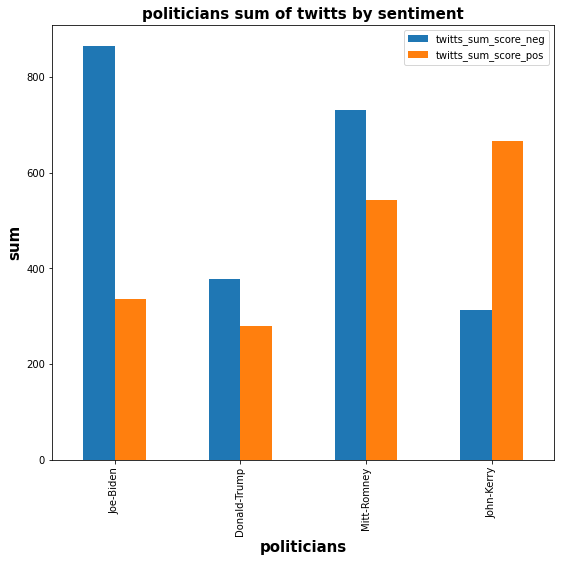

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(twitts_data_sf_gb_negPos_SF,columns=["politician","twitts_sum_score_neg","twitts_sum_score_pos"])
df.plot(x="politician", y=["twitts_sum_score_neg", "twitts_sum_score_pos"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("politicians sum of twitts by sentiment", fontweight ='bold', fontsize = 15)
plt.show()

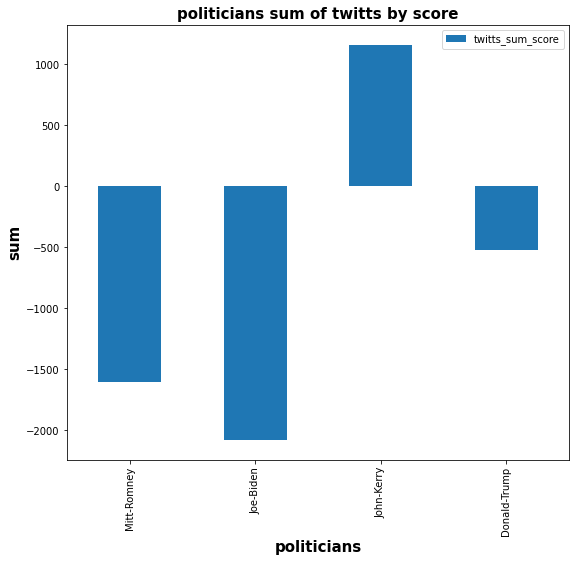

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(twitts_data_score_sf_gb,columns=["politician","twitts_sum_score"])
df.plot(x="politician", y=["twitts_sum_score"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("politicians sum of twitts by score", fontweight ='bold', fontsize = 15)
plt.show()

## **get articles from webs - BBC and NYT**

### imports

In [ ]:
###################################################### A
import datetime
import re
###################################################### B
from PIL import Image
import requests
# importing modules
import urllib.request
from PIL import Image

In [ ]:
import requests
import tqdm

### articles data from webs

#### BBC *website* 

##### BBC data

In [ ]:
def get_article_data_BBC(html, name):
  html = str(html)
  title = html.split("<a href")[1]
  if "<p class=" in title:
    title = title.split("<p class=")[1]
    title = title.split("<")[1]
    title = title.split(">")[1]
    title = title.split("<")[0]
  else:
    title=""

  content = html.split("<a href")[1]
  content = content.split("</a>")[1]
  if "<p class=" in content:
    content = content.split("<p class=")[1]
    content = content.split(">")[1]
    content = content.split(".</p")[0]
  else:
    content=""

  page_info = [ [name,title, content] ]
  return page_info

In [ ]:
def bbc_articles_by_name( urlP, nameP):
  all_data_from_wesite = []

  for page_num in range(1,29):
    page_list = [] 
    url =  str( urlP) + str(page_num)
    req_info = requests.get( str(url) ).content.decode('utf-8')
    html = req_info
    mainData2 = html.split("<div id=\"root\">")[1]
    mainData3 = mainData2.split("<main id=")[1]
    mainData4 = mainData3.split("<ul role=")[1]
    mainData5 = mainData4.split("<li>")

    for i in range( len(mainData5)) :
      article = mainData5[i]
      if i>0:
        article_info=""
        article_info = get_article_data_BBC(article, nameP)
        if len(article_info[0][1] )>1:
          page_list.extend( article_info )
    all_data_from_wesite.extend( page_list )
  return all_data_from_wesite

In [ ]:
all_data_from_wesite_bbc_trump = bbc_articles_by_name( "https://www.bbc.co.uk/search?q=trump&page=" , 'Donald-Trump')
all_data_from_wesite_bbc_mitt = bbc_articles_by_name( "https://www.bbc.co.uk/search?q=Mitt+Romney&page=", 'Mitt-Romney')
all_data_from_wesite_bbc_john_kerry = bbc_articles_by_name( "https://www.bbc.co.uk/search?q=John+Kerry&page=", 'John-Kerry')
all_data_from_wesite_bbc_biden = bbc_articles_by_name( "https://www.bbc.co.uk/search?q=joe+biden&page=", 'Joe-Biden')


In [ ]:
all_data_from_wesite_BBC = []
all_data_from_wesite_BBC.extend(all_data_from_wesite_bbc_trump)
all_data_from_wesite_BBC.extend(all_data_from_wesite_bbc_mitt)
all_data_from_wesite_BBC.extend(all_data_from_wesite_bbc_john_kerry)
all_data_from_wesite_BBC.extend(all_data_from_wesite_bbc_biden)

In [ ]:
website_data_BBC_df = pd.DataFrame( columns=['politician', 'content'])

for article in all_data_from_wesite_BBC:
  name = str( article[0] )
  title = str( article[1] )
  content = str( article[2] )

  all_text = title+". "+content
  website_data_BBC_df = website_data_BBC_df.append( {'politician' : name, 'content' : all_text}, ignore_index=True)

In [ ]:
website_data_BBC_df

,politician,content
0,Donald-Trump,Trump in Tweets. Examining how Trump used Twit...
1,Donald-Trump,The Trump Show. The inside story of the extrao...
2,Donald-Trump,The Trump Show: Downfall. The dramatic final c...
3,Donald-Trump,President Trump&#x27;s Trade Chief. US trade r...
4,Donald-Trump,The Second Impeachment of Donald Trump: The Se...
...,...,...
1115,Joe-Biden,Afghanistan: UK and US must protect Afghan act...
1116,Joe-Biden,Joe Biden: US democracy proved to be &#x27;res...
1117,Joe-Biden,US Election 2020: What do countries around the...
1118,Joe-Biden,US Congress: Joe Biden calls for President Tru...


##### BBC Afinn

In [ ]:
website_data_BBC_for_analasys = website_data_BBC_df

In [ ]:
def label2sentiment(label):
    if label >= 1:
        return "Positive"
    else:
        return "Negative"

In [ ]:
import turicreate.aggregate as agg

In [ ]:
website_data_BBC_for_analasys['content_afinn_score'] = website_data_BBC_for_analasys['content'].apply(lambda t: afinn.score(t))

In [ ]:
website_data_BBC_for_analasys = website_data_BBC_for_analasys[website_data_BBC_for_analasys['content_afinn_score'] != 0] #delete title with score 0 not pos and not neg

In [ ]:
website_data_BBC_for_analasys

,politician,content,content_afinn_score
2,Donald-Trump,The Trump Show: Downfall. The dramatic final c...,-2.0
4,Donald-Trump,The Second Impeachment of Donald Trump: The Se...,-9.0
5,Donald-Trump,Our World: Trump and God. Lebo Diseko meets Ch...,1.0
6,Donald-Trump,US judge reprimands Trump election fraud lawye...,-9.0
7,Donald-Trump,Reporting Trump&#x27;s First Year: The Fourth ...,3.0
...,...,...,...
1113,Joe-Biden,Joe Biden: It&#x27;s a &#x27;good thing&#x27; ...,8.0
1114,Joe-Biden,Afghanistan: UK and US must protect Afghan act...,7.0
1115,Joe-Biden,Coronavirus Global Update: Biden warns of a &#...,-2.0
1117,Joe-Biden,US Election 2020: What do countries around the...,3.0


In [ ]:
website_data_BBC_for_analasys['sentiment'] = website_data_BBC_for_analasys['content_afinn_score'].apply(lambda label: label2sentiment(label))

In [ ]:
website_data_BBC_for_analasys_SF  = tc.SFrame( website_data_BBC_for_analasys )
website_data_BBC_for_analasys_SF = website_data_BBC_for_analasys_SF['politician', 'content_afinn_score', 'sentiment']

In [ ]:
website_data_BBC_for_analasys_SF_sen = website_data_BBC_for_analasys_SF.groupby(['politician','sentiment'],{"articles_sum_sentiment":agg.COUNT()})
website_data_BBC_for_analasys_SF_score = website_data_BBC_for_analasys_SF.groupby(['politician'],{"articles_sum_score":agg.SUM('content_afinn_score')})

In [ ]:
website_data_BBC_for_analasys_SF_sen_neg = website_data_BBC_for_analasys_SF_sen
website_data_BBC_for_analasys_SF_sen_pos = website_data_BBC_for_analasys_SF_sen

In [ ]:
website_data_BBC_for_analasys_SF_sen_neg = website_data_BBC_for_analasys_SF_sen_neg[ website_data_BBC_for_analasys_SF_sen_neg['sentiment']=='Negative' ]
website_data_BBC_for_analasys_SF_sen_pos = website_data_BBC_for_analasys_SF_sen_pos[ website_data_BBC_for_analasys_SF_sen_pos['sentiment']=='Positive' ]

In [ ]:
website_data_BBC_for_analasys_SF_sen_NegPos = website_data_BBC_for_analasys_SF_sen_neg.join(website_data_BBC_for_analasys_SF_sen_pos, on='politician', how='inner')

In [ ]:
website_data_BBC_for_analasys_SF_sen_NegPos = website_data_BBC_for_analasys_SF_sen_NegPos.rename( {'articles_sum_sentiment.1': 'articles_sum_sentiment_pos'} )
website_data_BBC_for_analasys_SF_sen_NegPos = website_data_BBC_for_analasys_SF_sen_NegPos.rename( {'articles_sum_sentiment': 'articles_sum_sentiment_neg'} )

##### BBC WEB analasys

In [ ]:
website_data_BBC_for_analasys_SF_sen_NegPos

politician,sentiment,articles_sum_sentiment_neg ...,sentiment.1,articles_sum_sentiment_pos ...
Joe-Biden,Negative,104,Positive,87
Donald-Trump,Negative,115,Positive,67
Mitt-Romney,Negative,104,Positive,108
John-Kerry,Negative,128,Positive,84


In [ ]:
website_data_BBC_for_analasys_SF_score

politician,articles_sum_score
Mitt-Romney,84.0
Joe-Biden,-150.0
John-Kerry,-235.0
Donald-Trump,-289.0


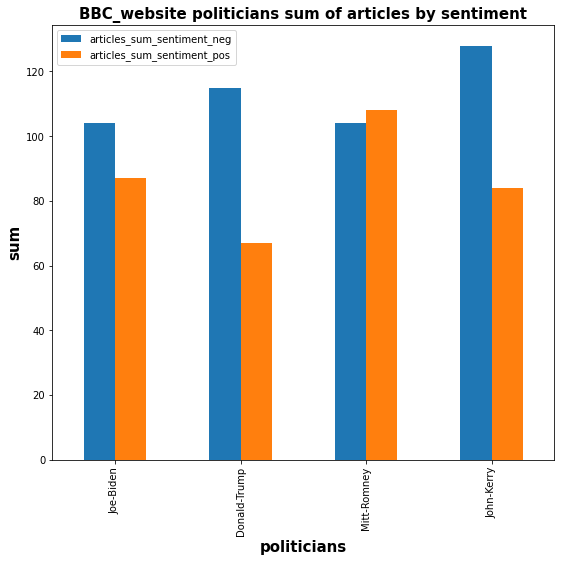

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(website_data_BBC_for_analasys_SF_sen_NegPos,columns=["politician","articles_sum_sentiment_neg","articles_sum_sentiment_pos"])
df.plot(x="politician", y=["articles_sum_sentiment_neg", "articles_sum_sentiment_pos"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("BBC_website politicians sum of articles by sentiment", fontweight ='bold', fontsize = 15)
plt.show()

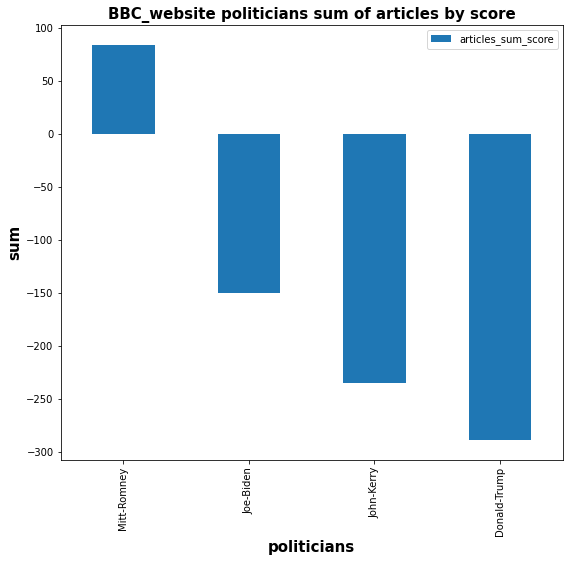

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(website_data_BBC_for_analasys_SF_score,columns=["politician","articles_sum_score"])
df.plot(x="politician", y=["articles_sum_score"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("BBC_website politicians sum of articles by score", fontweight ='bold', fontsize = 15)
plt.show()

#### new-york times *website* 

##### NYT data

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bioni

number of articles

In [ ]:
num_of_articles_Mitt_Romney = 1000
num_of_articles_kerry = 1000
num_of_articles_trump = 1000
num_of_articles_biden = 1000

num_of_articles = 100

trump

In [ ]:
import time
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
################################################################

url = 'https://www.nytimes.com/search?dropmab=true&query=Donald%20Trump&sections=Opinion%7Cnyt%3A%2F%2Fsection%2Fd7a71185-aa60-5635-bce0-5fab76c7c297&sort=best'
wd.get(url)
################################################################

New_york_times_articles_trump=[]
for num in range(1,num_of_articles):
    try:
        headlines=wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/h4')
        for el in headlines:
            headline=el.text

        briefs= wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/p[1]')
        for el in briefs:
            brief=el.text

        headline_and_brief=['Donald-Trump', headline+"."+brief]    
        New_york_times_articles_trump.append(headline_and_brief)

        click_next=wd.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[3]/div/button')
        webdriver.ActionChains(wd).move_to_element(click_next).click(click_next).perform()
        time.sleep(0.5)
        
    except Exception: 
      
      break


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


biden

In [ ]:
import time
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
################################################################

url = "https://www.nytimes.com/search?dropmab=true&query=joe%20biden&sections=Opinion%7Cnyt%3A%2F%2Fsection%2Fd7a71185-aa60-5635-bce0-5fab76c7c297&sort=best_page%3D%7B2%7D"
wd.get(url)
################################################################

New_york_times_articles_biden=[]
for num in range(1,num_of_articles):
    try:
        headlines=wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/h4')
        for el in headlines:
            headline=el.text
        
        briefs= wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/p[1]')
        for el in briefs:
            brief=el.text
        
        headline_and_brief=['Joe-Biden',  headline+"."+brief]    
        New_york_times_articles_biden.append(headline_and_brief)
        click_next=wd.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[3]/div/button')
        webdriver.ActionChains(wd).move_to_element(click_next).click(click_next).perform()
        time.sleep(0.5)

    except Exception: 
      
      break



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


Mitt Romney

In [ ]:
import time
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
################################################################

url = "https://www.nytimes.com/search?dropmab=true&query=Mitt%20Romney&sections=Opinion%7Cnyt%3A%2F%2Fsection%2Fd7a71185-aa60-5635-bce0-5fab76c7c297&sort=best"
wd.get(url)
################################################################

New_york_times_articles_Mitt=[]
for num in range(1,num_of_articles):
    try:
        headlines=wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/h4')
        for el in headlines:
            headline=el.text
        
        briefs= wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/p[1]')
        for el in briefs:
            brief=el.text
        
        headline_and_brief=['Mitt-Romney',  headline+"."+brief]    
        New_york_times_articles_Mitt.append(headline_and_brief)
        click_next=wd.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[3]/div/button')
        webdriver.ActionChains(wd).move_to_element(click_next).click(click_next).perform()
        time.sleep(0.5)

    except Exception: 
      
      break


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


Jhon Kerry


In [ ]:
import time
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
################################################################

url = "https://www.nytimes.com/search?dropmab=true&query=John%20Kerry&sections=Opinion%7Cnyt%3A%2F%2Fsection%2Fd7a71185-aa60-5635-bce0-5fab76c7c297&sort=best"
wd.get(url)
################################################################

New_york_times_articles_Jhon=[]
for num in range(1,num_of_articles):
    try:
        headlines=wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/h4')
        for el in headlines:
            headline=el.text

        briefs= wd.find_elements_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/ol/li['+str(num)+']/div/div/div/a/p[1]')
        for el in briefs:
            brief=el.text

        headline_and_brief=['John-Kerry',  headline+"."+brief]    
        New_york_times_articles_Jhon.append(headline_and_brief)
        click_next=wd.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[3]/div/button')
        webdriver.ActionChains(wd).move_to_element(click_next).click(click_next).perform()
        time.sleep(0.5)

    except Exception: 
      break



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
print(len(New_york_times_articles_trump))

print(len(New_york_times_articles_Mitt))

print(len(New_york_times_articles_biden))

print(len(New_york_times_articles_Jhon))



19
99
99
99


In [ ]:
all_data_from_wesite_New_York_times = []
all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
all_data_from_wesite_New_York_times

#######################################################for testing
# all_data_from_wesite_New_York_times = []
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Jhon)

# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_trump)

# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_biden)

# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times.extend(New_york_times_articles_Mitt)
# all_data_from_wesite_New_York_times

In [ ]:
New_york_times_df = pd.DataFrame( columns=['politician', 'content'])

for article in all_data_from_wesite_New_York_times:
  name = str( article[0] )
  content = str( article[1] )
  New_york_times_df = New_york_times_df.append( {'politician' : name, 'content' : content}, ignore_index=True)

In [ ]:
New_york_times_df

,politician,content
0,John-Kerry,John Kerry Speaks.Mitt Romney has been knockin...
1,John-Kerry,Springtime for John Kerry.Mitt Romney has been...
2,John-Kerry,John Kerry and War.Mitt Romney has been knocki...
3,John-Kerry,John Kerry for President.Mitt Romney has been ...
4,John-Kerry,John Kerry for President.Mitt Romney has been ...
...,...,...
3155,Mitt-Romney,Why the U.S. Needs the Romney Family Plan.Amer...
3156,Mitt-Romney,"The Corrupt, the Clueless and Joe Biden.Unity ..."
3157,Mitt-Romney,Mitt! Mitt! Mitt!.How about a refresher on all...
3158,Mitt-Romney,"Mitt Likes Music, Including This.The Gregory B..."


##### nyt-afinn

In [ ]:
New_york_times_analasys = New_york_times_df

In [ ]:
New_york_times_analasys

,politician,content,content_afinn_score
0,John-Kerry,John Kerry Speaks.Mitt Romney has been knockin...,0.0
1,John-Kerry,Springtime for John Kerry.Mitt Romney has been...,0.0
2,John-Kerry,John Kerry and War.Mitt Romney has been knocki...,-2.0
3,John-Kerry,John Kerry for President.Mitt Romney has been ...,0.0
4,John-Kerry,John Kerry for President.Mitt Romney has been ...,0.0
...,...,...,...
3155,Mitt-Romney,Why the U.S. Needs the Romney Family Plan.Amer...,0.0
3156,Mitt-Romney,"The Corrupt, the Clueless and Joe Biden.Unity ...",-3.0
3157,Mitt-Romney,Mitt! Mitt! Mitt!.How about a refresher on all...,2.0
3158,Mitt-Romney,"Mitt Likes Music, Including This.The Gregory B...",4.0


In [ ]:
def label2sentiment(label):
    if label >= 0:
        return "Positive"
    else:
        return "Negative"

In [ ]:
import turicreate.aggregate as agg

In [ ]:
New_york_times_analasys['content_afinn_score'] = New_york_times_analasys['content'].apply(lambda t: afinn.score(t))

In [ ]:
New_york_times_analasys = New_york_times_analasys[New_york_times_analasys['content_afinn_score'] != 0] #delete title with score 0 not pos and not neg

In [ ]:
New_york_times_analasys

,politician,content,content_afinn_score
0,John-Kerry,John Kerry Speaks.Mitt Romney has been knockin...,0.0
1,John-Kerry,Springtime for John Kerry.Mitt Romney has been...,0.0
2,John-Kerry,John Kerry and War.Mitt Romney has been knocki...,-2.0
3,John-Kerry,John Kerry for President.Mitt Romney has been ...,0.0
4,John-Kerry,John Kerry for President.Mitt Romney has been ...,0.0
...,...,...,...
3155,Mitt-Romney,Why the U.S. Needs the Romney Family Plan.Amer...,0.0
3156,Mitt-Romney,"The Corrupt, the Clueless and Joe Biden.Unity ...",-3.0
3157,Mitt-Romney,Mitt! Mitt! Mitt!.How about a refresher on all...,2.0
3158,Mitt-Romney,"Mitt Likes Music, Including This.The Gregory B...",4.0


In [ ]:
New_york_times_analasys['sentiment'] = New_york_times_analasys['content_afinn_score'].apply(lambda label: label2sentiment(label))

In [ ]:
New_york_times_analasys_SF  = tc.SFrame( New_york_times_analasys )
New_york_times_analasys_SF = New_york_times_analasys_SF['politician', 'content_afinn_score', 'sentiment']

In [ ]:
New_york_times_analasys_SF_sen = New_york_times_analasys_SF.groupby(['politician','sentiment'],{"articles_sum_sentiment":agg.COUNT()})
New_york_times_analasys_SF_score = New_york_times_analasys_SF.groupby(['politician'],{"articles_sum_score":agg.SUM('content_afinn_score')})

In [ ]:
New_york_times_analasys_SF_sen_neg = New_york_times_analasys_SF_sen
New_york_times_analasys_SF_sen_pos = New_york_times_analasys_SF_sen

In [ ]:
New_york_times_analasys_SF_sen_neg = New_york_times_analasys_SF_sen_neg[ New_york_times_analasys_SF_sen_neg['sentiment']=='Negative' ]
New_york_times_analasys_SF_sen_pos = New_york_times_analasys_SF_sen_pos[ New_york_times_analasys_SF_sen_pos['sentiment']=='Positive' ]

In [ ]:
New_york_times_analasys_SF_negPos = New_york_times_analasys_SF_sen_neg.join(New_york_times_analasys_SF_sen_pos, on='politician', how='inner')

In [ ]:
New_york_times_analasys_SF_negPos = New_york_times_analasys_SF_negPos.rename( {'articles_sum_sentiment.1': 'sum_sen_pos'} )
New_york_times_analasys_SF_negPos = New_york_times_analasys_SF_negPos.rename( {'articles_sum_sentiment': 'sum_sen_neg'} )

In [ ]:
New_york_times_analasys_SF_negPos

politician,sentiment,sum_sen_neg,sentiment.1,sum_sen_pos
Joe-Biden,Negative,480,Positive,510
Donald-Trump,Negative,110,Positive,80
Mitt-Romney,Negative,310,Positive,680
John-Kerry,Negative,220,Positive,770


##### nyt analasis

In [ ]:
New_york_times_analasys_SF_score

politician,articles_sum_score
Mitt-Romney,230.0
Joe-Biden,-360.0
John-Kerry,920.0
Donald-Trump,-160.0


In [ ]:
New_york_times_analasys_SF_negPos

politician,sentiment,sum_sen_neg,sentiment.1,sum_sen_pos
Joe-Biden,Negative,480,Positive,510
Donald-Trump,Negative,110,Positive,80
Mitt-Romney,Negative,310,Positive,680
John-Kerry,Negative,220,Positive,770


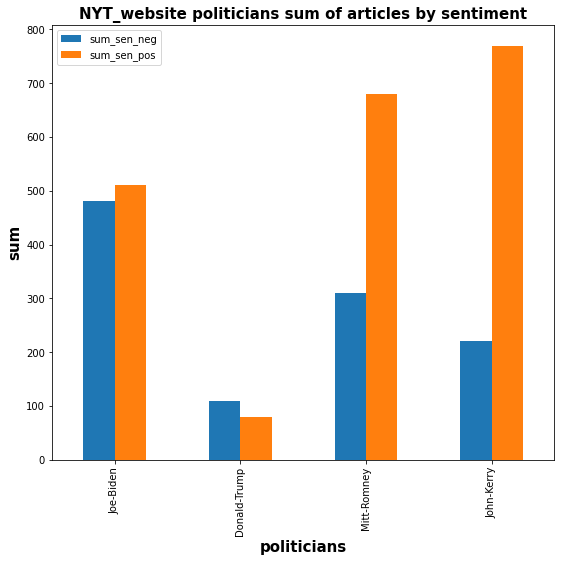

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(New_york_times_analasys_SF_negPos,columns=["politician","sum_sen_neg","sum_sen_pos"])
df.plot(x="politician", y=["sum_sen_neg", "sum_sen_pos"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("NYT_website politicians sum of articles by sentiment", fontweight ='bold', fontsize = 15)
plt.show()

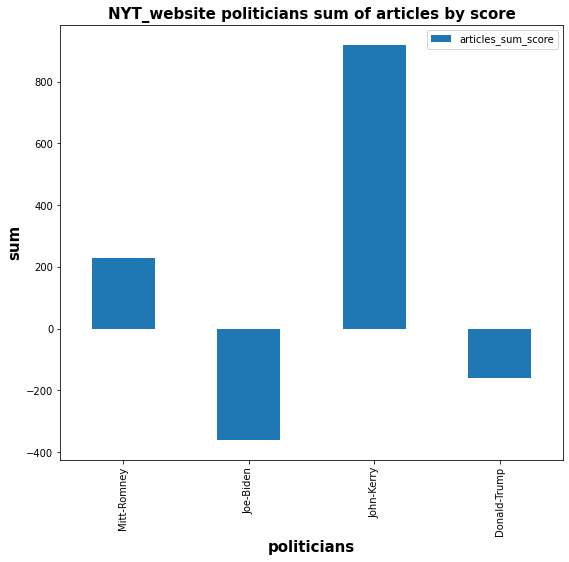

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(New_york_times_analasys_SF_score,columns=["politician","articles_sum_score"])
df.plot(x="politician", y=["articles_sum_score"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("NYT_website politicians sum of articles by score", fontweight ='bold', fontsize = 15)
plt.show()

#### **all 3 webs df**

In [ ]:
all_data_NYT_BBC_UsaT_DF = pd.concat( [website_data_BBC_df, New_york_times_df] )

##### more df

In [ ]:
all_data_NYT_BBC_UsaT_DF

,politician,content,content_afinn_score,sentiment
2,Donald-Trump,The Trump Show: Downfall. The dramatic final c...,-2.0,Negative
4,Donald-Trump,The Second Impeachment of Donald Trump: The Se...,-9.0,Negative
5,Donald-Trump,Our World: Trump and God. Lebo Diseko meets Ch...,1.0,Positive
6,Donald-Trump,US judge reprimands Trump election fraud lawye...,-9.0,Negative
7,Donald-Trump,Reporting Trump&#x27;s First Year: The Fourth ...,3.0,Positive
...,...,...,...,...
3964,Mitt-Romney,Growing Pains of Universal Coverage.Until Wash...,2.0,Positive
3965,Mitt-Romney,The Wrong Résumé.The evidence suggests that el...,-5.0,Negative
3966,Mitt-Romney,"The Definition of Insanity.Same old policies, ...",-2.0,Negative
3967,Mitt-Romney,Would John Kerry Have Picked Samuel Alito?.If ...,4.0,Positive


In [ ]:

sf_New_york_times=tc.SFrame( all_data_NYT_BBC_UsaT_DF )
sf_articles_on_politicians = sf_New_york_times.groupby("politician",{"all_articles_on_politicioan":agg.CONCAT("content")})
sf_articles_on_politicians

politician,all_articles_on_politicioan ...
Mitt-Romney,[Eugene Goodman hailedfor guiding Mitt Romney ...
Joe-Biden,[US election 2020: CanMike Pence reject Joe ...
John-Kerry,[Syria: The World&#x27;sWar: Series 1: Episod ...
Donald-Trump,[Why Do Republicans HateCops?.Turning their b ...


In [ ]:
articles_on_politicians_df=sf_articles_on_politicians.to_dataframe()

פה אני עושה מיזוג ומכניס גם את העמודה של התגובות בטוויטר שים לב שאני עושה מיזוג על השמות של הפוליטיקאים אז השמות חייבים להיות תואמים בשתי הטבלאות

In [ ]:
# articles_and_comments_df = pd.merge(comments_on_politicians_df, articles_on_politicians_df, on="politician")


In [ ]:
# score_articles_and_comments_df=articles_and_comments_df
# score_articles_and_comments_df


In [ ]:
# !pip install afinn

In [ ]:
# def convert_to_string(s):
#   sentences=""
#   for word in s:
#     sentences=sentences+' '+word
#   return sentences 

# score_articles_and_comments_df['all_comments']=score_articles_and_comments_df['all_comments'].apply(lambda s:convert_to_string(s))
# score_articles_and_comments_df['all_articles_on_politicioan']=score_articles_and_comments_df['all_articles_on_politicioan'].apply(lambda s:convert_to_string(s))

In [ ]:
# from afinn import Afinn
# afinn = Afinn()

# score_articles_and_comments_df['afinn_score_comments'] = articles_and_comments_df['all_comments'].apply(lambda t: afinn.score(t))
# score_articles_and_comments_df['afinn_score_articles'] = articles_and_comments_df['all_articles_on_politicioan'].apply(lambda t: afinn.score(t))
# score_articles_and_comments_df

In [ ]:
# import sys
# import time
# sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
# from selenium import webdriver

# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

# ###################################################################################
# list_of_all_articles=[]
# url = 'https://www.nytimes.com/search?dropmab=true&query=donald%22trump&sections=Opinion%7Cnyt%3A%2F%2Fsection%2Fd7a71185-aa60-5635-bce0-5fab76c7c297&sort=best%5Fpage%3D%7B2%7D'
# wd.get(url)


# donal_trump_url = 'https://www.nytimes.com/search?dropmab=true&query=donald%22trump&sections=Opinion%7Cnyt%3A%2F%2Fsection%2Fd7a71185-aa60-5635-bce0-5fab76c7c297&sort=best%5Fpage%3D%7B2%7D'
# # kamala_harris_url = 
# # joe_biden_url = 
# # mike_pence_url = 

# number_of_articles = 10

# New_york_times_articles_trump = new_york_times_get_all_articlesByName( donal_trump_url, 'Donald_Trump', number_of_articles, wd)
# # New_york_times_articles_harris = new_york_times_get_all_articlesByName( kamala_harris_url, 'Kamala_Harris', number_of_articles)
# # New_york_times_articles_biden = new_york_times_get_all_articlesByName( joe_biden_url, 'Joe_Biden', number_of_articles)
# # New_york_times_articles_mike = new_york_times_get_all_articlesByName( mike_pence_url, 'Mike_Pence', number_of_articles)

### web and articles afinn all websites

In [ ]:
def label2sentiment(label):
    if label >= 0:
        return "Positive"
    else:
        return "Negative"

In [ ]:
import turicreate.aggregate as agg

In [ ]:
all_data_NYT_BBC_UsaT_DF['content_afinn_score'] = all_data_NYT_BBC_UsaT_DF['content'].apply(lambda t: afinn.score(t))

In [ ]:
all_data_NYT_BBC_UsaT_DF = all_data_NYT_BBC_UsaT_DF[all_data_NYT_BBC_UsaT_DF['content_afinn_score'] != 0] #delete title with score 0 not pos and not neg

In [ ]:
all_data_NYT_BBC_UsaT_DF

,politician,content,content_afinn_score
2,Donald-Trump,The Trump Show: Downfall. The dramatic final c...,-2.0
4,Donald-Trump,The Second Impeachment of Donald Trump: The Se...,-9.0
5,Donald-Trump,Our World: Trump and God. Lebo Diseko meets Ch...,1.0
6,Donald-Trump,US judge reprimands Trump election fraud lawye...,-9.0
7,Donald-Trump,Reporting Trump&#x27;s First Year: The Fourth ...,3.0
...,...,...,...
3953,Mitt-Romney,The Romney Family Plan Sees the True Value of ...,6.0
3956,Mitt-Romney,"The Corrupt, the Clueless and Joe Biden.Unity ...",-3.0
3957,Mitt-Romney,Mitt! Mitt! Mitt!.How about a refresher on all...,2.0
3958,Mitt-Romney,"Mitt Likes Music, Including This.The Gregory B...",4.0


In [ ]:
all_data_NYT_BBC_UsaT_DF['sentiment'] = all_data_NYT_BBC_UsaT_DF['content_afinn_score'].apply(lambda label: label2sentiment(label))

In [ ]:
all_data_NYT_BBC_UsaT_DF

,politician,content,content_afinn_score,sentiment
2,Donald-Trump,The Trump Show: Downfall. The dramatic final c...,-2.0,Negative
4,Donald-Trump,The Second Impeachment of Donald Trump: The Se...,-9.0,Negative
5,Donald-Trump,Our World: Trump and God. Lebo Diseko meets Ch...,1.0,Positive
6,Donald-Trump,US judge reprimands Trump election fraud lawye...,-9.0,Negative
7,Donald-Trump,Reporting Trump&#x27;s First Year: The Fourth ...,3.0,Positive
...,...,...,...,...
3964,Mitt-Romney,Growing Pains of Universal Coverage.Until Wash...,2.0,Positive
3965,Mitt-Romney,The Wrong Résumé.The evidence suggests that el...,-5.0,Negative
3966,Mitt-Romney,"The Definition of Insanity.Same old policies, ...",-2.0,Negative
3967,Mitt-Romney,Would John Kerry Have Picked Samuel Alito?.If ...,4.0,Positive


In [ ]:
all_data_NYT_BBC_UsaT_SF  = tc.SFrame( all_data_NYT_BBC_UsaT_DF )
all_data_NYT_BBC_UsaT_SF = all_data_NYT_BBC_UsaT_SF['politician', 'content_afinn_score', 'sentiment']

In [ ]:
all_data_NYT_BBC_UsaT_SF

politician,content_afinn_score,sentiment
Donald-Trump,-2.0,Negative
Donald-Trump,-9.0,Negative
Donald-Trump,1.0,Positive
Donald-Trump,-9.0,Negative
Donald-Trump,3.0,Positive
Donald-Trump,2.0,Positive
Donald-Trump,-3.0,Negative
Donald-Trump,1.0,Positive
Donald-Trump,-5.0,Negative
Donald-Trump,-2.0,Negative


In [ ]:
all_data_NYT_BBC_UsaT_gb_sen_sf = all_data_NYT_BBC_UsaT_SF.groupby(['politician','sentiment'],{"articles_sum_sentiment":agg.COUNT()})
all_data_NYT_BBC_UsaT_gb_score_sf = all_data_NYT_BBC_UsaT_SF.groupby(['politician'],{"articles_sum_score":agg.SUM('content_afinn_score')})

In [ ]:
all_data_NYT_BBC_UsaT_gb_sen_sf

politician,sentiment,articles_sum_sentiment
Joe-Biden,Positive,440
Donald-Trump,Positive,358
Mitt-Romney,Positive,503
Mitt-Romney,Negative,419
Donald-Trump,Negative,574
John-Kerry,Positive,454
Joe-Biden,Negative,600
John-Kerry,Negative,338


In [ ]:
all_data_NYT_BBC_UsaT__gb_SF_neg = all_data_NYT_BBC_UsaT_gb_sen_sf
all_data_NYT_BBC_UsaT__gb_SF_pos = all_data_NYT_BBC_UsaT_gb_sen_sf

In [ ]:
all_data_NYT_BBC_UsaT__gb_SF_neg = all_data_NYT_BBC_UsaT__gb_SF_neg[ all_data_NYT_BBC_UsaT__gb_SF_neg['sentiment']=='Negative' ]
all_data_NYT_BBC_UsaT__gb_SF_pos = all_data_NYT_BBC_UsaT__gb_SF_pos[ all_data_NYT_BBC_UsaT__gb_SF_pos['sentiment']=='Positive' ]

In [ ]:
all_data_NYT_BBC_UsaT_gb_negPos_SF = all_data_NYT_BBC_UsaT__gb_SF_neg.join(all_data_NYT_BBC_UsaT__gb_SF_pos, on='politician', how='inner')

In [ ]:
all_data_NYT_BBC_UsaT_gb_negPos_SF

politician,sentiment,articles_sum_sentiment,sentiment.1,articles_sum_sentiment.1
Joe-Biden,Negative,600,Positive,440
Donald-Trump,Negative,574,Positive,358
Mitt-Romney,Negative,419,Positive,503
John-Kerry,Negative,338,Positive,454


In [ ]:
all_data_NYT_BBC_UsaT_gb_negPos_SF = all_data_NYT_BBC_UsaT_gb_negPos_SF.rename( {'articles_sum_sentiment.1': 'articles_sum_sentiment_pos'} )
all_data_NYT_BBC_UsaT_gb_negPos_SF = all_data_NYT_BBC_UsaT_gb_negPos_SF.rename( {'articles_sum_sentiment': 'articles_sum_sentiment_neg'} )

In [ ]:
all_data_NYT_BBC_UsaT_gb_negPos_SF

politician,sentiment,articles_sum_sentiment_neg ...,sentiment.1,articles_sum_sentiment_pos ...
Joe-Biden,Negative,600,Positive,440
Donald-Trump,Negative,574,Positive,358
Mitt-Romney,Negative,419,Positive,503
John-Kerry,Negative,338,Positive,454


In [ ]:
all_data_NYT_BBC_UsaT_gb_score_sf

politician,articles_sum_score
Mitt-Romney,486.0
Joe-Biden,-576.0
John-Kerry,525.0
Donald-Trump,-864.0


## all final data tables

In [ ]:
score_articles_twitts = twitts_data_score_sf_gb.join(all_data_NYT_BBC_UsaT_gb_score_sf, on='politician', how='inner')

In [ ]:
twitts_data_score_sf_gb

politician,twitts_sum_score
Mitt-Romney,-1605.0
Joe-Biden,-2079.0
John-Kerry,1162.0
Donald-Trump,-520.0


In [ ]:
twitts_data_sf_gb_negPos_SF

politician,sentiment,twitts_sum_score_neg,sentiment.1,twitts_sum_score_pos
Joe-Biden,Negative,866,Positive,336
Donald-Trump,Negative,378,Positive,279
Mitt-Romney,Negative,731,Positive,543
John-Kerry,Negative,312,Positive,667


In [ ]:
all_data_NYT_BBC_UsaT_gb_negPos_SF

politician,sentiment,articles_sum_sentiment_neg ...,sentiment.1,articles_sum_sentiment_pos ...
Joe-Biden,Negative,600,Positive,440
Donald-Trump,Negative,574,Positive,358
Mitt-Romney,Negative,419,Positive,503
John-Kerry,Negative,338,Positive,454


In [ ]:
all_data_NYT_BBC_UsaT_gb_score_sf

politician,articles_sum_score
Mitt-Romney,486.0
Joe-Biden,-576.0
John-Kerry,525.0
Donald-Trump,-864.0


In [ ]:
score_articles_twitts

politician,twitts_sum_score,articles_sum_score
Mitt-Romney,-1605.0,486.0
Joe-Biden,-2079.0,-576.0
John-Kerry,1162.0,525.0
Donald-Trump,-520.0,-864.0


## graphs

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(all_data_NYT_BBC_UsaT_gb_negPos_SF,columns=["politician","articles_sum_sentiment_neg","articles_sum_sentiment_pos"])
df.plot(x="politician", y=["articles_sum_sentiment_neg", "articles_sum_sentiment_pos"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("politicians sum of articles by sentiment", fontweight ='bold', fontsize = 15)
plt.show()

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(all_data_NYT_BBC_UsaT_gb_score_sf,columns=["politician","articles_sum_score"])
df.plot(x="politician", y=["articles_sum_score"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("politicians sum of articles by score", fontweight ='bold', fontsize = 15)
plt.show()

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(twitts_data_sf_gb_negPos_SF,columns=["politician","twitts_sum_score_neg","twitts_sum_score_pos"])
df.plot(x="politician", y=["twitts_sum_score_neg", "twitts_sum_score_pos"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("politicians sum of twitts by sentiment", fontweight ='bold', fontsize = 15)
plt.show()

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(twitts_data_score_sf_gb,columns=["politician","twitts_sum_score"])
df.plot(x="politician", y=["twitts_sum_score"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("politicians sum of twitts by score", fontweight ='bold', fontsize = 15)
plt.show()

In [ ]:
score_articles_twitts

politician,twitts_sum_score,articles_sum_score
Mitt-Romney,-1605.0,486.0
Joe-Biden,-2079.0,-576.0
John-Kerry,1162.0,525.0
Donald-Trump,-520.0,-864.0


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


df=pd.DataFrame(score_articles_twitts,columns=["politician","twitts_sum_score","articles_sum_score"])
df.plot(x="politician", y=["twitts_sum_score", "articles_sum_score"], kind="bar",figsize=(9,8))

# Adding Xticks
plt.xlabel('politicians', fontweight ='bold', fontsize = 15)
plt.ylabel('sum', fontweight ='bold', fontsize = 15)
plt.title("politicians sentiment analasys - articles VS twitts", fontweight ='bold', fontsize = 15)
plt.show()

# Part 3 - Prediction of political articles and twitts

## data

In [ ]:
import turicreate as tc
from nltk.corpus import stopwords
from nltk.stem.porter import *
from functools import lru_cache
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
stop_words_set = set(stopwords.words("english"))
stemmer = PorterStemmer()

#Using cahcing for faster performence
@lru_cache(maxsize=None)
def word_stemming(w):
    return stemmer.stem(w)


def skip_word(w):
    if len(w) <2:
        return True
    if w.isdigit():
        return True
    if w in stop_words_set or stemmer.stem(w) in stop_words_set:
        return True
    return False

def text_to_bow(text):
    text = text.lower()
    l = [word_stemming(w) for w in word_tokenize(text) if not skip_word(w) ]
    l = [w for w in l if not skip_word(w)]
    d = Counter(l)
    return dict(d)

In [ ]:
all_data_NYT_BBC_DF = New_york_times_analasys

In [ ]:
all_data_NYT_BBC_DF

,politician,content,content_afinn_score,sentiment
0,John-Kerry,John Kerry Speaks.Mitt Romney has been knockin...,0.0,Positive
1,John-Kerry,John Kerry and War.Mitt Romney has been knocki...,-2.0,Negative
2,John-Kerry,Springtime for John Kerry.Mitt Romney has been...,0.0,Positive
3,John-Kerry,John Kerry for President.Mitt Romney has been ...,0.0,Positive
4,John-Kerry,John Kerry for President.Mitt Romney has been ...,0.0,Positive
...,...,...,...,...
3955,Mitt-Romney,Why the U.S. Needs the Romney Family Plan.Amer...,0.0,Positive
3956,Mitt-Romney,"The Corrupt, the Clueless and Joe Biden.Unity ...",-3.0,Negative
3957,Mitt-Romney,Mitt! Mitt! Mitt!.How about a refresher on all...,2.0,Positive
3958,Mitt-Romney,"Mitt Likes Music, Including This.The Gregory B...",4.0,Positive


In [ ]:

bow_list = []
for t in all_data_NYT_BBC_DF['content']:
    bow_list.append(text_to_bow(t))
all_data_NYT_BBC_DF['bow'] = bow_list

docs = all_data_NYT_BBC_DF['bow']

In [ ]:
all_data_NYT_BBC_DF

,politician,content,content_afinn_score,sentiment,bow
0,John-Kerry,John Kerry Speaks.The Gregory Brothers present...,2.0,Positive,"{'john': 1, 'kerri': 1, 'speaks.th': 1, 'grego..."
1,John-Kerry,Springtime for John Kerry.The Gregory Brothers...,2.0,Positive,"{'springtim': 1, 'john': 1, 'kerry.th': 1, 'gr..."
2,John-Kerry,John Kerry and War.The Gregory Brothers presen...,0.0,Positive,"{'john': 1, 'kerri': 1, 'war.th': 1, 'gregori'..."
3,John-Kerry,John Kerry for President.The Gregory Brothers ...,2.0,Positive,"{'john': 1, 'kerri': 1, 'president.th': 1, 'gr..."
4,John-Kerry,John Kerry for President.The Gregory Brothers ...,2.0,Positive,"{'john': 1, 'kerri': 1, 'president.th': 1, 'gr..."
...,...,...,...,...,...
3955,Mitt-Romney,Why the U.S. Needs the Romney Family Plan.Amer...,0.0,Positive,"{'u.s.': 1, 'need': 2, 'romney': 1, 'famili': ..."
3956,Mitt-Romney,"The Corrupt, the Clueless and Joe Biden.Unity ...",-3.0,Negative,"{'corrupt': 1, 'clueless': 1, 'joe': 1, 'biden..."
3957,Mitt-Romney,Mitt! Mitt! Mitt!.How about a refresher on all...,2.0,Positive,"{'mitt': 4, '.how': 1, 'refresh': 1, 'book': 1..."
3958,Mitt-Romney,The Curse of the Mitt.Mitt Romney has been kno...,-1.0,Negative,"{'curs': 1, 'mitt.mitt': 1, 'romney': 1, 'knoc..."


In [ ]:
import turicreate as tc
all_data_NYT_BBC_SF = tc.SFrame.read_csv(all_data_NYT_BBC_DF)

In [ ]:
import spacy
from tqdm import tqdm

nlp = spacy.load('en_core_web_lg')
def get_entites_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        if  label not in entities_dict:
            entities_dict[label] = set()
        entities_dict[label].add(entity.text)        

    return entities_dict

l =[] 
for i in tqdm(range(len(all_data_NYT_BBC_DF['content']))):
    t = all_data_NYT_BBC_DF[i]['content']
    l.append(get_entites_from_text(t))




In [ ]:
all_data_NYT_BBC_DF['bow'] = tc.text_analytics.count_words(all_data_NYT_BBC_DF['content'])
all_data_NYT_BBC_DF['bow'] = all_data_NYT_BBC_DF['bow'].apply(lambda d: {k:v for k,v in d.items() if v > 1})
all_data_NYT_BBC_DF['tfidf'] = tc.text_analytics.tf_idf(all_data_NYT_BBC_DF['bow'])

## create the model

In [ ]:
train, test = sf.random_split(0.8)
cls = tc.classifier.create(train, features=["bow", "tfidf"], target="Label")